In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import color
from skimage.io import imread
from skimage.color import rgb2gray
import glob
import cv2
from skimage.filters import threshold_otsu,threshold_niblack
from skimage.exposure import equalize_hist

C:\Users\Lucas Santos\AppData\Local\Temp\ipykernel_18508\2973982520.py:7: RuntimeWarning: divide by zero encountered in divide
  result_image = 1 / (1 + (k / image) ** E)


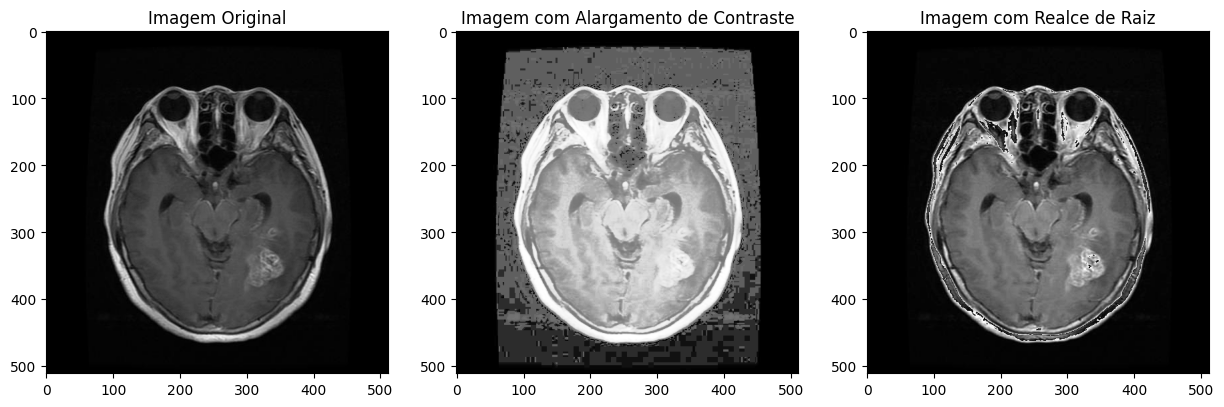

In [5]:
def alargam_contraste(image, k, E):
    # Verificar se a imagem é um array NumPy
    if not isinstance(image, np.ndarray):
        raise ValueError("A entrada deve ser uma matriz NumPy.")

    # Aplicar a transformação de alargamento de contraste à imagem
    result_image = 1 / (1 + (k / image) ** E)

    # Normalizar os valores resultantes para o intervalo [0, 255]
    result_image = (result_image * 255).astype(np.uint8)

    return result_image

# Função para aplicar a transformação de n-ésima potência em uma imagem
def power_transform(image, gamma):
    result = np.power(image, gamma)
    return result.astype(np.uint8)

# Carregar uma imagem em escala de cinza
# image = cv2.imread('images/modelo2.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.imread('imagens/gg.jpg', cv2.IMREAD_GRAYSCALE)

# Definir os parâmetros k e E (ajuste conforme necessário)
# k = 100
# E = 2

# k controla a inclinação da transformação e afeta a quantidade de alargamento.
# E controla a forma da curva de transformação e influencia como o contraste é ajustado.

# Aplicar a transformação de alargamento de contraste
equalized_image = equalize_hist(image)
# result_image = alargam_contraste(equalized_image, k = 2, E = 3)
result_image = alargam_contraste(image, k = 250, E = 1)

equalized_image2 = equalize_hist(result_image)

power_image = power_transform(image, gamma=1.1)


# Exibir a imagem original e a imagem resultante
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title('Imagem Original')
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Imagem com Alargamento de Contraste')
plt.imshow(equalized_image2, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Imagem com Realce de Raiz')
plt.imshow(power_image, cmap='gray')
plt.show()

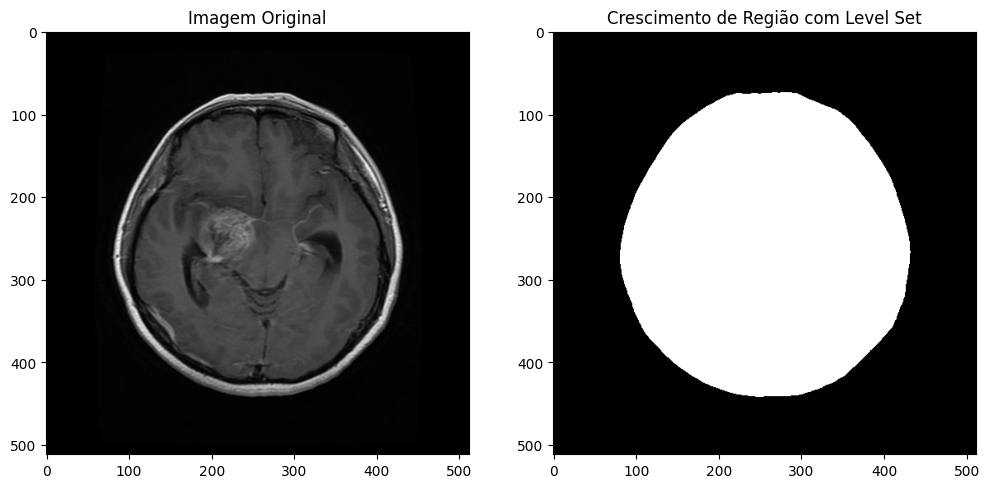

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import morphological_chan_vese
from skimage import io, color

def region_growth_level_set(image):
    # Convertendo a imagem para escala de cinza se necessário
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Aplicando o método Chan-Vese para segmentação
    segmented = morphological_chan_vese(image, num_iter=100, init_level_set="disk", smoothing=1, lambda1=1, lambda2=1)

    return segmented

# Carregar a imagem
image_path = "glioma_tumor/gg (15).jpg"  # Substitua pelo caminho correto
image = io.imread(image_path)

# Aplicar o algoritmo de crescimento de região com Level Set
segmented_image = region_growth_level_set(image)

# Visualização dos resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Crescimento de Região com Level Set')

plt.show()
